In [2]:

import tensorflow as tf

# tf.logging.set_verbosity(tf.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.3.0


In [3]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [4]:
print('x_train shape',x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train shape (60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


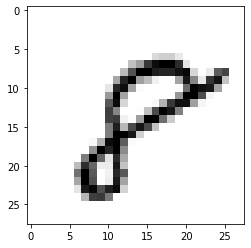

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(x_train[59999],cmap='binary')
plt.show()

In [6]:
y_train[59999
]

8

In [7]:
from tensorflow.keras.utils import to_categorical
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [8]:
print(y_train_encoded.shape)

(60000, 10)


In [9]:
y_train_encoded[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
y_test_encoded[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
import numpy as np
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)

(60000, 784)
(10000, 784)


In [12]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [13]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)
epsilon=1e-10
x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

In [14]:
print(set(x_test_norm[0]))

{-0.4240738943910262, 0.6450706082224981, 1.4978406281642376, 1.930589593507807, 1.5996639141274305, 0.3396007503329197, 2.4015222910875735, 2.8088154349403447, 2.6433525952501564, 2.096052433197995, 1.7396709323268205, 0.4286961255507134, -0.20769941171924156, -0.19497150097384247, 2.73244797046795, 2.3887943803421745, 2.3633385588513764, 0.13595417840653412, 1.1160033058022647, 0.4923356792777089, -0.15678776873764516, 0.059586713934139515, -0.14405985799224608, 1.17964285952926, 0.5305194115139061, 2.465161844814569, 2.439706023323771, 2.7579037919587486, 2.490617666305367, 2.7960875241949457, 2.8215433456857437, 2.7451758812133495, 2.7706317027041476, 2.1596919869249906, 2.426978112578372, 1.2178265917654574, 0.2377774643697269, 0.5559752330047044, -0.41134598364562713, -0.18224359022844336, 0.9250846446212782, -0.38589016215482896, 0.02140298169794222, -0.029508661283654175, 1.8924058612716097, 2.579713041523161, 2.2360594513973853, 2.5415293092869637, -0.36043434066403074, 2.1851

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential([
    Dense(128, activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])


In [16]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3737 - accuracy: 0.8916
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1817 - accuracy: 0.9471
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1375 - accuracy: 0.9601


In [18]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)

313/313 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9599


In [19]:
print("saccuracy",accuracy*100)

saccuracy 95.99000215530396


In [20]:
preds=model.predict(x_test_norm)
print('shape of pred',preds.shape)

shape of pred (10000, 10)


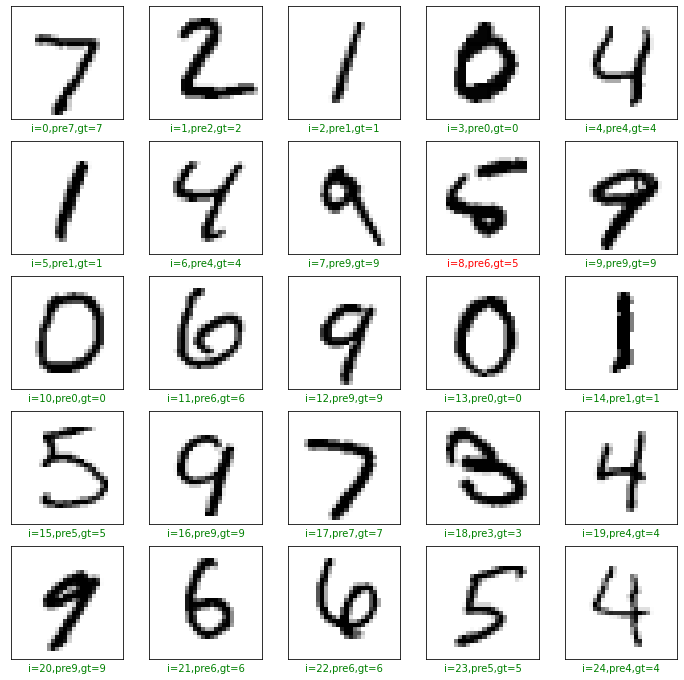

In [23]:
plt.figure(figsize=(12,12))
start_index=0
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    col='g'
    if pred!=gt:
        col='r'
    plt.xlabel('i={},pre{},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
plt.show()

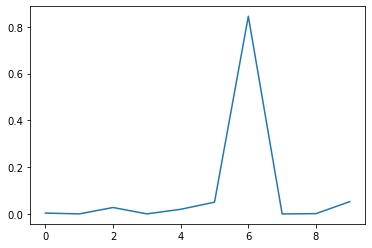

In [24]:
plt.plot(preds[8])
plt.show()